In [197]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from train_set import Training_set
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [194]:
# Split the combined dataframe into features and labels
X = Training_set.iloc[:, :-1]
#Y has the last col with labels
Y = Training_set.iloc[:, -1]


In [195]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the RFE object and fit it to the data
rfe = RFE(estimator=rf, n_features_to_select=10, step=1)
rfe.fit(X, Y)

KeyboardInterrupt: 

In [ ]:
# Get the selected features
selected_features = X.columns[rfe.support_]
X_rfe = pd.concat([X[selected_features]], axis=1)

# Print the selected features
# print(selected_features)
display(X_rfe)
# display(Y)
ranks = rfe.ranking_


In [8]:
# split the dataset to train and test, the 2nd is for the non feature selection
X_train, X_test, Y_train, Y_test = train_test_split(X_rfe, Y, test_size=0.2, random_state=42)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [9]:
# Define the parameter grid to search over , Here we want to find optimal parameters for our random forest model
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]
              }

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Use GridSearchCV to search over the parameter grid
grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [70]:
#train the classifier
clf = RandomForestClassifier(max_depth= 5, min_samples_leaf = 2, min_samples_split = 3, n_estimators= 50, random_state=42)
clf1 = RandomForestClassifier(max_depth= 5, min_samples_leaf = 2, min_samples_split = 3, n_estimators= 50, random_state=42)
clf.fit(X_train, Y_train)
clf1.fit(X1_train, Y1_train)


RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=50, random_state=42)

In [71]:
# evaluate the accuracy of it

Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred, average='macro')
recall = metrics.recall_score(Y_test, Y_pred, average='macro')
f1_score = metrics.f1_score(Y_test, Y_pred, average='macro')
print("With rfe feature selection:")
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-score: {f1_score:.3f}')

Y1_pred = clf1.predict(X1_test)
accuracy1 = accuracy_score(Y1_test, Y1_pred)
precision1 = metrics.precision_score(Y1_test, Y1_pred, average='macro')
recall1 = metrics.recall_score(Y1_test, Y1_pred, average='macro')
f1_score1= metrics.f1_score(Y1_test, Y1_pred, average='macro')
print("Without feature selection:")
print(f'Accuracy: {accuracy1:.3f}')
print(f'Precision: {precision1:.3f}')
print(f'Recall: {recall1:.3f}')
print(f'F1-score: {f1_score1:.3f}')

With rfe feature selection:
Accuracy: 0.850
Precision: 0.900
Recall: 0.833
F1-score: 0.830
Without feature selection:
Accuracy: 0.800
Precision: 0.806
Recall: 0.794
F1-score: 0.797


In [72]:
importances = clf.feature_importances_
print( importances)
n = 10
indices = importances.argsort()[::-1][:n]
selected_features2 = X.columns[indices]
print("Selected features:", selected_features2)

[0.03746235 0.05971064 0.07750942 0.06005041 0.07146902 0.07920505
 0.07266733 0.44763349 0.06421119 0.0300811 ]
Selected features: Index([8, 6, 3, 7, 5, 9, 4, 2, 1, 10], dtype='object')


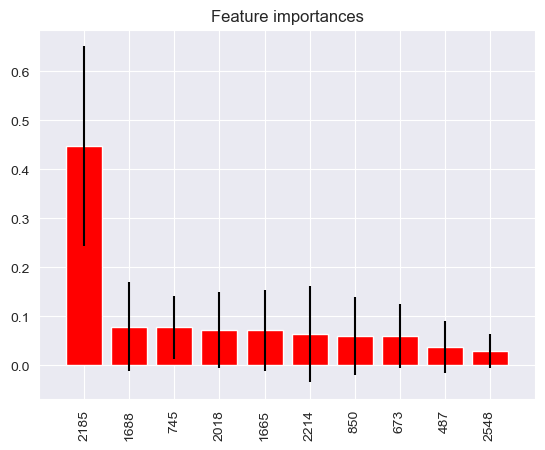

In [73]:
# Visualize the feature importances
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_rfe.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_rfe.shape[1]), X_rfe.columns[indices], rotation=90)
plt.xlim([-1, X_rfe.shape[1]])
plt.show()

In [80]:
# Stratified 10-fold cross-validation so each fold will have a representative proportion of each class
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracy_scores = []


# Have to transform the dataframe to numpy array for the stratified 10 fold
Xfold = X_rfe[[487, 673, 745, 850, 1665, 1688, 2018, 2185, 2214, 2548]].values


# loop over each fold ( fold= fold counter), train & test indices of the samples in each fold
for fold, (train_index, test_index) in enumerate(skf.split(Xfold, Y)):
    print(train_index)
    Xfold_train, Xfold_test = Xfold[train_index], Xfold[test_index]
    Yfold_train, Yfold_test = Y[train_index], Y[test_index]

    # Train the classifier on the training data
    clf.fit(Xfold_train, Yfold_train)

    # Test the classifier on the test data
    y_pred = clf.predict(Xfold_test)

    # Compute the accuracy score and append it to the list of scores
    score = accuracy_score(Yfold_test, y_pred)
    accuracy_scores.append(score)



[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 26 27 28 29 30 31 32 33 35 36 38 39 40 41 42 43 44 45 46 48 49 51 52 53
 55 56 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79
 80 81 82 83 84 85 86 87 89 90 91 92 94 95 96 97 98 99]
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24 25
 27 28 29 30 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 50 51 52
 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 70 72 73 74 75 76 77 78
 79 80 81 83 84 85 86 87 88 89 90 92 93 94 95 96 97 98]
[ 0  1  2  3  4  5  6  7  8  9 10 11 14 15 17 18 19 20 21 22 23 24 25 26
 28 29 30 31 32 33 34 35 36 37 38 39 41 42 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 75 78 79 80
 81 82 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 24 25
 26 27 28 29 30 31 32 34 35 37 38 40 41 43 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 6

In [81]:
# Calculate the mean accuracy score and its standard deviation
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
print("Mean accuracy: {:.2f}%".format(mean_accuracy*100))
print("Standard deviation: {:.2f}%".format(std_accuracy*100))

Mean accuracy: 91.00%
Standard deviation: 7.00%


<Axes: >

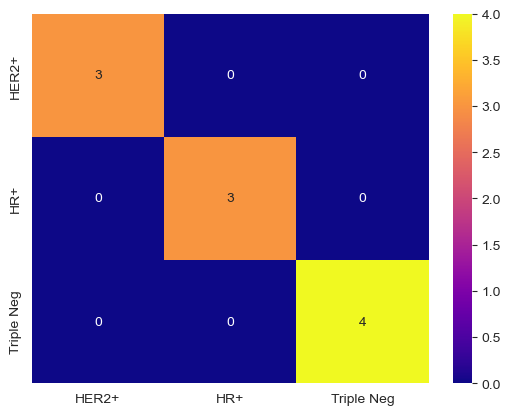

In [82]:
cm = confusion_matrix(Yfold_test, y_pred)
labels = ["HER2+", "HR+", "Triple Neg"]
sns.heatmap(cm, annot=True, cmap="plasma", fmt="d", xticklabels=labels, yticklabels=labels)

[0.17064204 0.05147388]


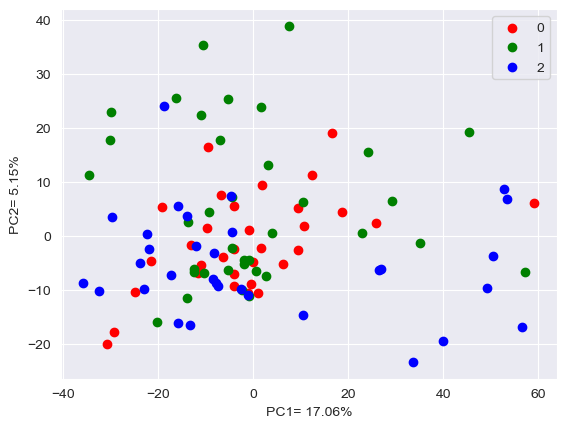

                 PC1        PC2       label
Array.129  -0.135898  -4.790558       HER2+
Array.34   -9.414722   4.346587         HR+
Array.67  -20.225184 -15.990391         HR+
Array.24  -29.699000   3.450170  Triple Neg
Array.22   -4.423732   0.725733  Triple Neg
...              ...        ...         ...
Array.10  -19.334851   5.364799       HER2+
Array.123  -7.057249  17.795526         HR+
Array.100  -0.945247 -11.051487         HR+
Array.134   7.586307  38.859537         HR+
Array.130   0.987908 -10.635331       HER2+

[100 rows x 3 columns]


In [182]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
label_encoder = LabelEncoder()
X_scaled = scaler.fit_transform(X)
# 2 principle components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# To see how much each pc explains
print(pca.explained_variance_ratio_)

# Create a new DataFrame that includes the PCA results and the labels
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'], index=X.index)

# Needed to decode the labels for the legend and colors
Y_encoded = label_encoder.fit_transform(Y)
pca_df['label'] = Y_encoded

# colors for the labels
color_map = {
    0: 'r', # HER2+
    1: 'g', # HR+
    2: 'b'  # Triple Neg
}

# Scatter plot of the first two PCs
fig, ax = plt.subplots()
for label, color in color_map.items():
    mask = pca_df['label'] == label
    ax.scatter(pca_df.loc[mask, 'PC1'], pca_df.loc[mask, 'PC2'], c=color, label=label)
ax.legend()
ax.set_xlabel('PC1= 17.06%')
ax.set_ylabel('PC2= 5.15%')
plt.show()
pca_df['label'] = label_encoder.inverse_transform(pca_df['label'])
print(pca_df)


In [162]:
Xpca = pca_df.iloc[:, :-1]
#Y has the last col with labels
Ypca = pca_df.iloc[:, -1]

Xpca.head()

,PC1,PC2
Array.129,-0.135898,-4.809937
Array.34,-9.414722,4.350689
Array.67,-20.225185,-15.986411
Array.24,-29.699001,3.439561
Array.22,-4.423732,0.728543


In [ ]:
Xpca_train, Xpca_test, Ypca_train, Ypca_test = train_test_split(Xpca, Ypca, test_size=0.2, random_state=42)

In [ ]:
# Define the parameter grid to search over , Here we want to find optimal parameters for our random forest model
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]
              }

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Use GridSearchCV to search over the parameter grid
grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(Xpca_train, Ypca_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)



Best hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


KeyboardInterrupt: 

In [175]:
#train the classifier
clf = RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42)

clf.fit(Xpca_train, Ypca_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

In [176]:
# evaluate the accuracy of it

Ypca_pred = clf.predict(Xpca_test)
accuracy = accuracy_score(Ypca_test, Ypca_pred)
precision = metrics.precision_score(Ypca_test, Ypca_pred, average='macro')
recall = metrics.recall_score(Ypca_test, Ypca_pred, average='macro')
f1_score = metrics.f1_score(Ypca_test, Ypca_pred, average='macro')
print("With rfe feature selection:")
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-score: {f1_score:.3f}')

With rfe feature selection:
Accuracy: 0.600
Precision: 0.605
Recall: 0.603
F1-score: 0.595


In [178]:
# Stratified 10-fold cross-validation so each fold will have a representative proportion of each class
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracy_scores = []


Xfold = Xpca[["PC1","PC2"]].values
print(Xfold)
# loop over each fold ( fold= fold counter), train & test indices of the samples in each fold
for fold, (train_index, test_index) in enumerate(skf.split(Xfold, Ypca)):
    Xfold_train, Xfold_test = Xfold[train_index], Xfold[test_index]
    Yfold_train, Yfold_test = Y[train_index], Y[test_index]

    # Train the classifier on the training data
    clf.fit(Xfold_train, Yfold_train)

    # Test the classifier on the test data
    y_pred = clf.predict(Xfold_test)

    # Compute the accuracy score and append it to the list of scores
    score = accuracy_score(Yfold_test, y_pred)
    accuracy_scores.append(score)

# Calculate the mean accuracy score and its standard deviation
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
print("Mean accuracy: {:.2f}%".format(mean_accuracy * 100))
print("Standard deviation: {:.2f}%".format(std_accuracy * 100))

[[ -0.13589837  -4.80993707]
 [ -9.41472191   4.35068885]
 [-20.22518455 -15.98641061]
 [-29.69900069   3.43956056]
 [ -4.42373201   0.72854281]
 [-14.04690798 -11.45090351]
 [ -9.58901787  16.48415158]
 [-13.04907161  -1.59989976]
 [ -2.6148618   -9.80923668]
 [ 18.66490046   4.41645959]
 [-10.94718881  22.33660569]
 [ 53.48248464   6.92716707]
 [-29.26736178 -17.68440492]
 [-21.6207779   -4.57757853]
 [ 26.79505925  -6.11152526]
 [ 52.80906698   8.65380939]
 [ -5.26000336  25.27103434]
 [ -4.06200424  -9.26395598]
 [ -0.86732016  -4.47952841]
 [-10.41953468  -6.9197274 ]
 [-13.35841208 -16.50094742]
 [ -6.88098196   7.59589509]
 [ 45.46719311  19.22260991]
 [-10.98864261  -5.45185881]
 [ -1.96711903  -4.52706676]
 [ 16.47662436  18.97351784]
 [ -0.83263445   1.05671708]
 [-18.73486474  23.96718545]
 [  1.54818411  -2.19502035]
 [ 35.10017337  -1.22297218]
 [ 29.10060876   6.50768597]
 [ -4.10740579  -2.4708102 ]
 [ 10.43317547   6.22534974]
 [  6.2433233   -5.2563829 ]
 [-10.57044573